# PROJET 5 : CATEGORISATION DES QUESTIONS 
#### AUTEUR : Fancpois Xavier Wockmatchieu
##  PARTIE I  : TRAITEMENT DE DONNEES ET ANALYSE EXPORATOIRE 

### I.  [NETTOYAGE DU TEXTE   ](#nettoyage)<br>
### II.  [ANALYSE DES QUESTIONS  ](#questions)<br>
### III.  [ANALYSE DU CORPUS GLOBAL   ](#corpus)<br>
### IV.  [ANALYSE DES TAGS  ](#tags)<br>


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(color_codes=True, font_scale=1.33)
0.

#--------- nettoyage du teste 

import re
from bs4 import BeautifulSoup 

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer  


#---------- traitement gensim 
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess

[nltk_data] Downloading package punkt to C:\Users\François-
[nltk_data]     Xavier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\François-
[nltk_data]     Xavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Apercu des différentes caractéristiques d'un post 

In [2]:
post_echantillon = pd.read_csv("essai_2.txt",sep = ",",header = 0)
post_echantillon.head(4)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,737,59832.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,2021-02-26 03:31:15,2021-02-26 03:31:15,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...,14.0,5,57.0,NaN,2012-10-31 16:42:47,CC BY-SA 4.0
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,309,21861.0,<p>I have an absolutely positioned <code>div</...,9.0,...,2021-01-29 18:46:45,2021-01-29 18:46:45,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,7.0,1,12.0,NaN,NaN,CC BY-SA 4.0
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,490,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,...,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,2048,692869.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,2021-01-05 17:33:32,2021-09-09 18:22:12,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,66.0,9,477.0,NaN,2011-08-16 19:40:43,CC BY-SA 4.0


In [3]:
post_echantillon.columns.size

23

In [4]:
post_echantillon.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense'],
      dtype='object')

In [5]:
use_ful = ['Id', 'PostTypeId','Title','Body','Tags','Score']

In [6]:
post_echantillon[use_ful].head(3)

,Id,PostTypeId,Title,Body,Tags,Score
0,4,1,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,737
1,6,1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,309
2,7,2,NaN,<p>An explicit cast to <code>double</code> lik...,NaN,490


LECON retenue :  plusieurs variables sont inutiles dans le contexte du sujet , reduction et prise en compte exclusivement des variables essentielles  .

#### chargement du fichier 

In [7]:
post_data =   pd.read_csv("FILE_QUESTIONS.txt",sep = ",",header = 0)
post_data.shape

(48883, 5)

In [8]:
post_data.head(3)

,Id,Title,Body,Tags,Score
0,4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,737
1,6,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,309
2,9,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,2048


##### verification  et gestion des valeurs manquantes 

In [9]:
def manage_missing_values(data_question) :
    missing = data_question.isna().sum(axis = 0)
    tab_missing = pd.DataFrame({"variables":missing.index,"nb_valeurs_manaquantes":missing.values})
    return  tab_missing

In [10]:
manage_missing_values(post_data)

,variables,nb_valeurs_manaquantes
0,Id,0
1,Title,0
2,Body,0
3,Tags,0
4,Score,0



## I. <a class = "anchor" id = "nettoyage" > NETTOYAGE DU TEXTE  <a/>
 

#### fonction de nettoyege

In [11]:
def text_cleaning(teste_brute) :
    # suppression des  balises HTML
    text_html_off = BeautifulSoup(teste_brute).get_text() 
    
    # prise en compte des versiosn 
    #text_version =  re.sub(r'\b\d+\b', " ",  text_html_off)   # peut etre enlever cette histoire de version
    
    #suppresion des numeriques
    text_nonum = re.sub(r'\d+', '',  text_html_off)
    
    # tokénisation
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    text_token =tokenizer.tokenize(text_nonum)
    
    # minisculisation
    text_miniscule  = [word.lower() for word in  text_token]    
    
    # suppression des séparateurs 
    stoppeurs = set(stopwords.words("english")) 
    text_stopper_off = [word for word in text_miniscule if word not in stoppeurs]
    
    return( " ".join(text_stopper_off))


def text_cleaning_stemming(teste_brute) :
    # suppression des  balises HTML
    text_html_off = BeautifulSoup(teste_brute).get_text() 
    
    # prise en compte des versiosn 
    #text_version =  re.sub(r'\b\d+\b', " ",  text_html_off)   # peut etre enlever cette histoire de version
    # suprresion des nombres
    text_nonum = re.sub(r'\d+', '',  text_html_off)
    # tokénisation
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    text_token =tokenizer.tokenize(text_nonum)
    
    # minisculisation
    text_miniscule  = [word.lower() for word in  text_token]    
    
    # suppression des séparateurs 
    stoppeurs = set(stopwords.words("english")) 
    text_stopper_off = [word for word in text_miniscule if word not in stoppeurs]
    
    # sterminisation
    ps = PorterStemmer()
    text_stem = [ps.stem(word) for word in text_stopper_off]
    
    return( " ".join(text_stem))

#### verification

In [12]:
text_essai_brut = post_data["Body"][1]
text_essai_brut

"<p>I have an absolutely positioned <code>div</code> containing several children, one of which is a relatively positioned <code>div</code>. When I use a <code>percentage-based width</code> on the child <code>div</code>, it collapses to <code>0 width</code> on IE7, but not on Firefox or Safari.</p>\n<p>If I use <code>pixel width</code>, it works. If the parent is relatively positioned, the percentage width on the child works.</p>\n<ol>\n<li>Is there something I'm missing here?</li>\n<li>Is there an easy fix for this besides the <code>pixel-based width</code> on the child?</li>\n<li>Is there an area of the CSS specification that covers this?</li>\n</ol>\n"

In [13]:
# verification cleanning
test_essai_clean= text_cleaning(text_essai_brut)
test_essai_clean

'absolutely positioned div containing several children one relatively positioned div use percentage based width child div collapses width ie firefox safari use pixel width works parent relatively positioned percentage width child works something missing easy fix besides pixel based width child area css specification covers'

In [14]:
# verification cleanning and stemming 
test_essai_clean= text_cleaning_stemming(text_essai_brut)
test_essai_clean

'absolut posit div contain sever children one rel posit div use percentag base width child div collaps width ie firefox safari use pixel width work parent rel posit percentag width child work someth miss easi fix besid pixel base width child area css specif cover'

#### nettoyage du texte 

######   fusion du titre et  texte du post 

In [15]:
def title_body_concatenation(df):
    body_title =  df["Title"].values + " " + df["Body"].values
    return body_title
               

#### construction du texte correspondant à chaque post 

* texte brut nettoyé 

In [16]:
post_data["cleanned_text"] = title_body_concatenation(post_data)
post_data["cleanned_text"] = post_data["cleanned_text"].apply(text_cleaning)
post_data.head(1)

,Id,Title,Body,Tags,Score,cleanned_text
0,4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,737,convert decimal double c want use track bar ch...


* texte brut normalisé 

In [17]:
post_data["stem_text"] = title_body_concatenation(post_data)
post_data["stem_text"] = post_data["stem_text"].apply(text_cleaning_stemming)
post_data.head(1)

,Id,Title,Body,Tags,Score,cleanned_text,stem_text
0,4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,737,convert decimal double c want use track bar ch...,convert decim doubl c want use track bar chang...


#### corpus global sans racinisation pour analyse 

In [18]:
corpus_brut = []
tokenizer_2 = nltk.RegexpTokenizer(r'\w+')
n_post = post_data.shape[0]
for index_post in np.arange(n_post) :
    corpus_brut += tokenizer_2.tokenize(post_data.loc[index_post,"cleanned_text"])

In [19]:
len(corpus_brut)

3242602

 nous essayons de proceder à une petite analyse de ce corpus général qui contient plus de trois millions de mots pour 48 milles posts et poussiere


## II. <a class = "anchor" id = "questions"> Analyse des  Questions </a>

* fonction d'évaluation statistique de chacune des cprpus 

In [20]:
def stats_corpora_question(dict_questions):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    corpora = dict()
    for idex_q,val_q in dict_questions.items(): 
        corpora[idex_q] = tokenizer.tokenize(val_q)
    stats, freq = dict(), dict()

    for k, v in corpora.items():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
        
    return(freq, stats, corpora)
        

#### statistiques  sur des questions nettoyées 

In [21]:
questions = post_data.filter(items=["cleanned_text"]).to_dict()
questions = questions["cleanned_text"]
freq, stats, corpora = stats_corpora_question(questions)
questions_stats = pd.DataFrame.from_dict(stats, orient='index')

In [22]:
questions_stats["total"].describe()

count    48883.000000
mean        66.333940
std         65.434738
min          1.000000
25%         30.000000
50%         49.000000
75%         81.000000
max       2669.000000
Name: total, dtype: float64

In [23]:
questions_stats["unique"].describe()

count    48883.000000
mean        44.067181
std         32.727223
min          1.000000
25%         22.000000
50%         36.000000
75%         56.000000
max        682.000000
Name: unique, dtype: float64

* répartition des mots dans les questions

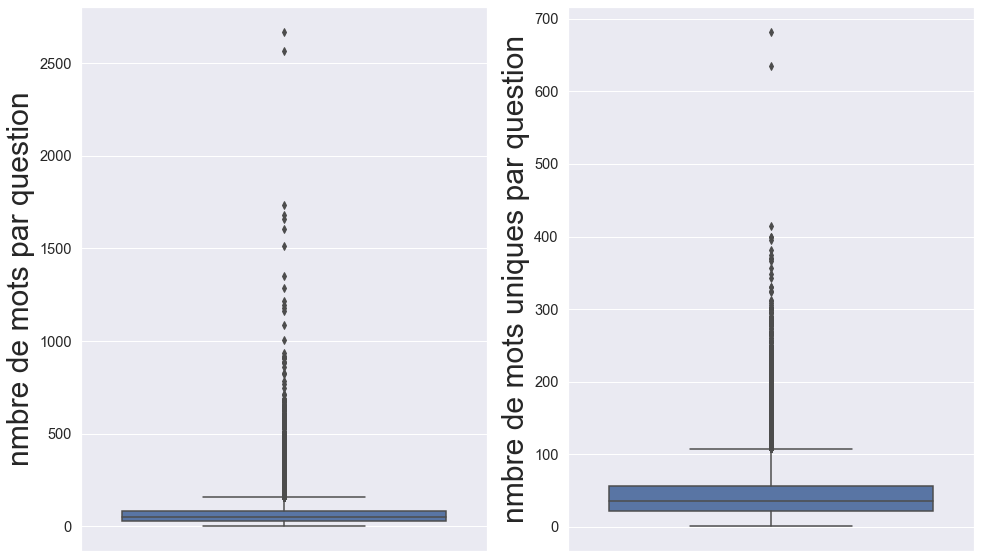

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize = (16,10))
plt.subplot(1, 2, 1)
sns.boxplot(y = questions_stats["total"])
plt.ylabel("nmbre de mots par question",fontsize = 30)
plt.subplot(1, 2, 2)
sns.boxplot(y = questions_stats["unique"])
plt.ylabel("nmbre de mots uniques par question",fontsize = 30)
plt.show()
plt.savefig("analyse_question.png")

* visualisation du contenu des questions classées par ordre croissant de leur volume 

<AxesSubplot:title={'center':'nb de mots uniques __ nb de mots__ par question'}, xlabel='unique'>

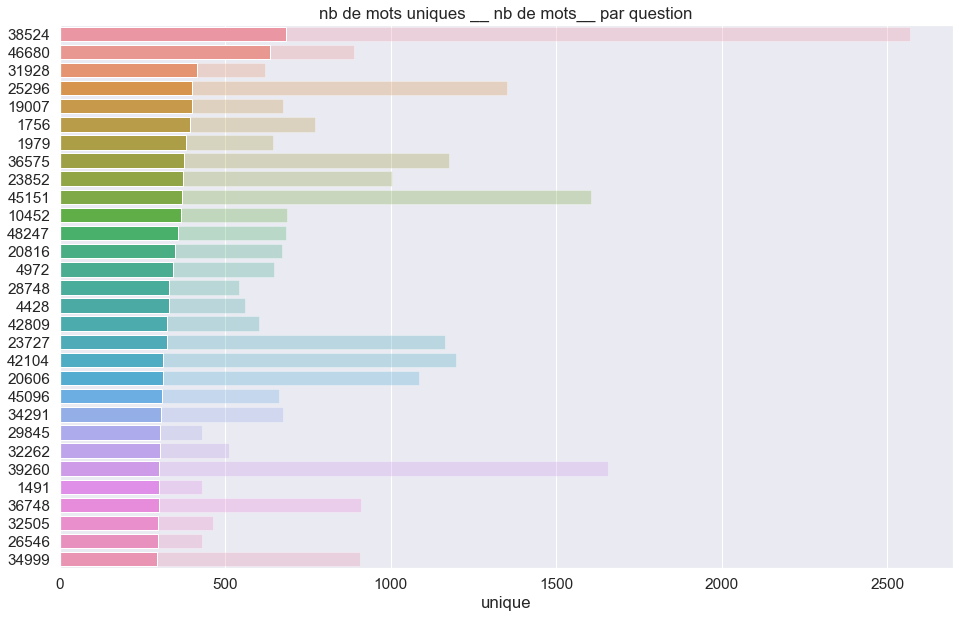

In [31]:
fig = plt.figure(figsize=(16, 10))
plt.title("nb de mots uniques __ nb de mots__ par question")
df_plot = questions_stats.sort_values(by=['unique'], ascending=False).head(30)
ax = sns.barplot(y=df_plot.index, order= df_plot.index,
            x="total",orient="h",
            data=df_plot, alpha=0.3)
sns.barplot(y=df_plot.index, order= df_plot.index,
            x="unique",orient="h",
            data=df_plot, ax=ax)


#### statistiques sur des questions racinisées 

In [32]:
questions_stem = post_data.filter(items=["stem_text"]).to_dict()
questions_stem = questions_stem["stem_text"]
freq_stem, stats_stem, corpora_stem = stats_corpora_question(questions_stem)
questions_stem_stats = pd.DataFrame.from_dict(stats_stem, orient='index')

In [33]:
questions_stem_stats["total"].describe()

count    48883.000000
mean        66.333940
std         65.434738
min          1.000000
25%         30.000000
50%         49.000000
75%         81.000000
max       2669.000000
Name: total, dtype: float64

In [34]:
questions_stem_stats["unique"].describe()

count    48883.000000
mean        41.332774
std         29.931168
min          1.000000
25%         21.000000
50%         34.000000
75%         53.000000
max        603.000000
Name: unique, dtype: float64

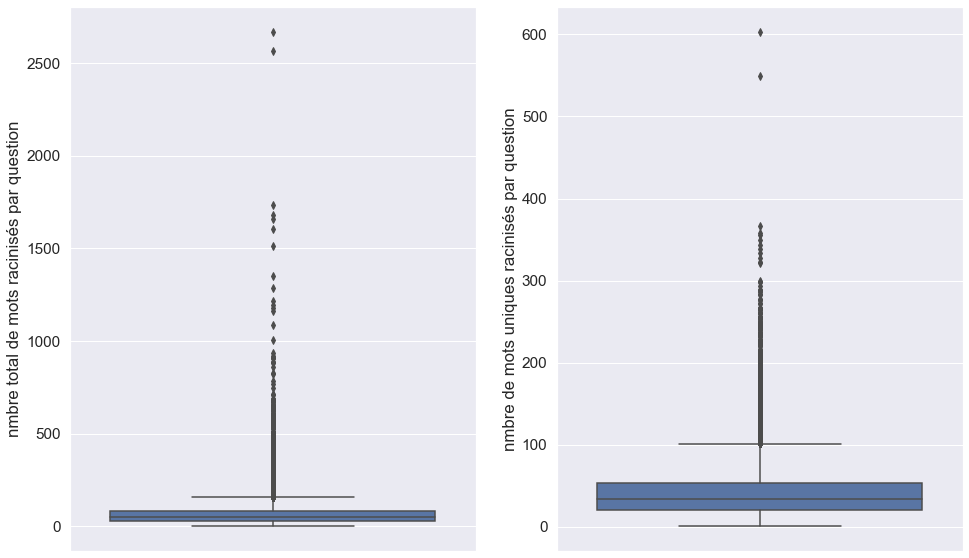

In [35]:
plt.figure(figsize = (16,10))
plt.subplot(1, 2, 1)
sns.boxplot(y = questions_stem_stats["total"])
plt.ylabel("nmbre total de mots racinisés par question")
plt.subplot(1, 2, 2)
sns.boxplot(y = questions_stem_stats["unique"])
plt.ylabel("nmbre de mots uniques racinisés par question")
plt.show()

<AxesSubplot:title={'center':'nb de mots racinisés uniques __ nb de mots racinisés__ par question'}, xlabel='unique'>

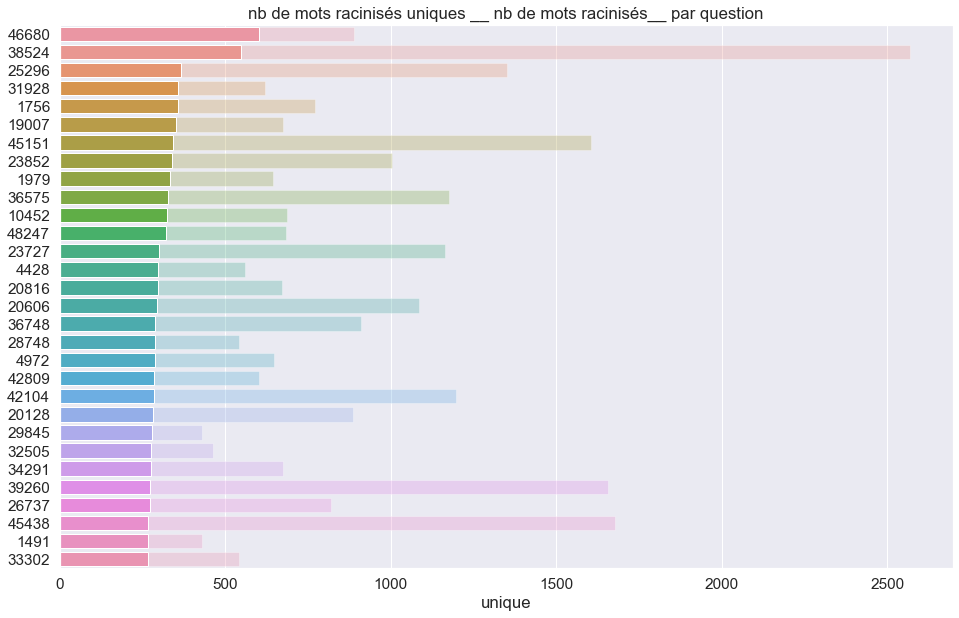

In [36]:
fig = plt.figure(figsize=(16, 10))
plt.title("nb de mots racinisés uniques __ nb de mots racinisés__ par question")
df_plot = questions_stem_stats.sort_values(by=['unique'], ascending=False).head(30)
ax = sns.barplot(y=df_plot.index, order= df_plot.index,
            x="total",orient="h",
            data=df_plot, alpha=0.3)
sns.barplot(y=df_plot.index, order= df_plot.index,
            x="unique",orient="h",
            data=df_plot, ax=ax)


##  <a class = "anchor" id = "corpus"> Analyse du Corpus Global </a>

* fusion des corpus des différentes questions 

In [37]:
def corpus_construction(question_stem) :
    n = len(question_stem)
    corpus = list()
   
    for j in np.arange(n) :
        corpus += question_stem[j].split()
    return corpus

In [38]:
word_corpus_data =  corpus_construction(questions_stem)
corpus_data = pd.DataFrame({"word":word_corpus_data })
len(corpus_data)

3242602

In [39]:
corpus_data_stat  = pd.DataFrame({"word" : corpus_data["word"].value_counts().index,"nb_occurence":corpus_data["word"].value_counts().values})
corpus_data_stat

,word,nb_occurence
0,use,53496
1,like,24505
2,file,23359
3,c,20859
4,code,20692
...,...,...
79990,faebebeaeafcafbd,1
79991,ddbafdeadbefdadbea,1
79992,userisonlinetimewindow,1
79993,aspksjiuiugf,1


In [40]:
corpus_tt = list(corpus_data_stat["word"])
corpus_tt = ' '.join(corpus_tt)


79995 mots racinisés uniques pour un corpus racibisé de 3242602

* apercu du vocabulaire du corpus

C:\Users\François-Xavier\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\François-Xavier\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\François-Xavier\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\François-Xavier\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\François-Xavier\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0, 

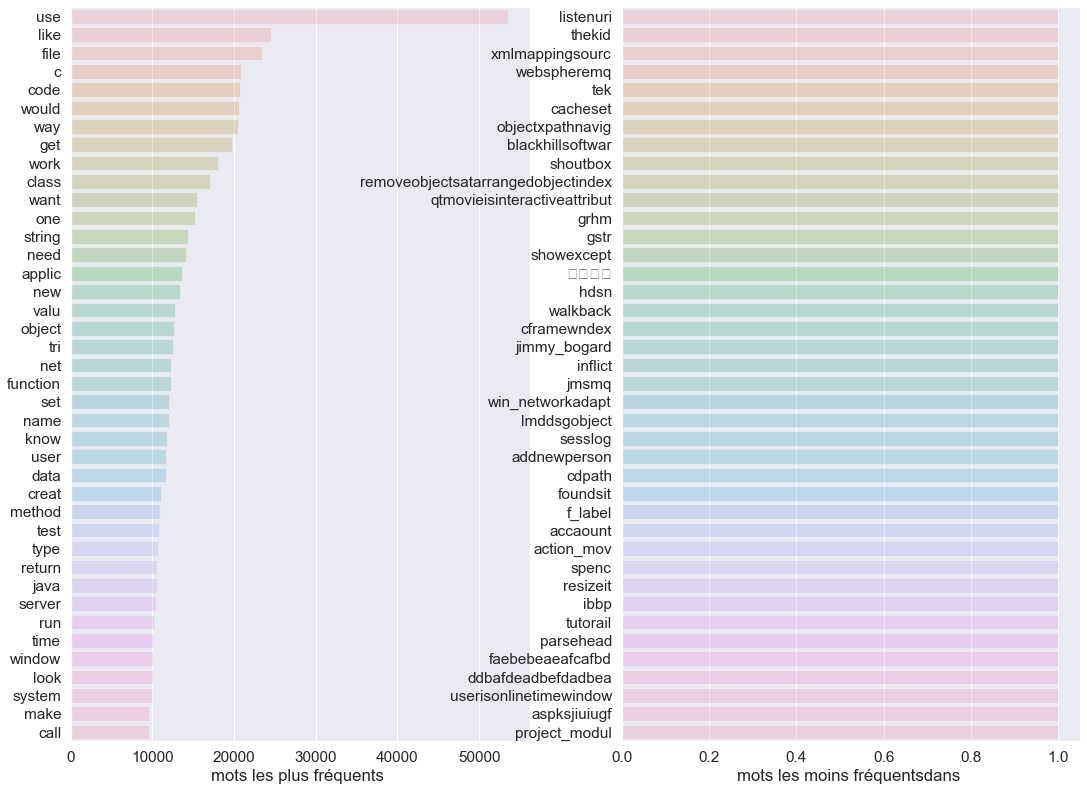

In [41]:
sns.set(font_scale=1.4) 
figure, axes = plt.subplots(nrows=1, ncols=2,figsize = (16,12))
figure.tight_layout(pad=3.0)
plt.subplot(1,2,1)
g1 =sns.barplot(y= corpus_data_stat["word"].head(40),
            x=corpus_data_stat["nb_occurence"].head(40),orient="h",
            data= corpus_data_stat, alpha=0.3,axes = axes[0])
g1.set(ylabel=None)
plt.xlabel("mots les plus fréquents ")
plt.subplot(1,2,2)
g2 =sns.barplot(y= corpus_data_stat["word"].tail(40),
            x= corpus_data_stat["nb_occurence"].tail(40),orient="h",
            data= corpus_data_stat, alpha=0.3,axes = axes[1])
g2.set(ylabel=None)
plt.xlabel("mots les moins fréquentsdans ")
plt.show()

* representation du vocabulaire en nuage des points 

(-0.5, 799.5, 499.5, -0.5)

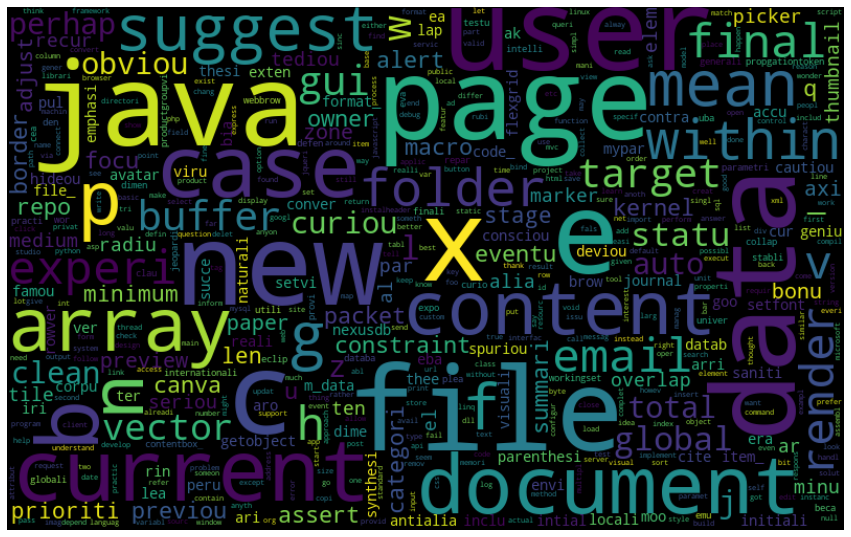

In [45]:
#corpus_text =  " ".join(list(corpus_data_stat["word"])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110,max_words=500,).generate(corpus_tt)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')


## IV <a class = "anchor" id = "tags">  Analyse des Tags  </a>

###### nettoyage des tags 

In [46]:
def apply_nb_tags(str_tags):
    return len(re.findall(r'(?<=\<)[^\<\>]+(?=\>)', str_tags))

In [47]:
def cleannning_tag(tags):
    return re.findall(r'(?<=\<)[^\<\>]+(?=\>)', tags)

In [48]:
test_tag_clean = cleannning_tag(post_data.loc[0,"Tags"])
test_tag_clean

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']

In [49]:
post_data["cleaned_tag"] = post_data["Tags"].apply(cleannning_tag)

###### nombres de tags concernant les questions postées 

In [50]:
def count_tags_post(tags) :
    nb_tags = len(tags)
    return nb_tags

post_data["nb_tags"] = post_data["cleaned_tag"].apply(count_tags_post)

In [51]:
post_data.head(3)

,Id,Title,Body,Tags,Score,cleanned_text,stem_text,cleaned_tag,nb_tags
0,4,How to convert a Decimal to a Double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...,737,convert decimal double c want use track bar ch...,convert decim doubl c want use track bar chang...,"[c#, floating-point, type-conversion, double, ...",5
1,6,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,309,width collapse percentage width child element ...,width collaps percentag width child element ab...,"[html, css, internet-explorer-7]",3
2,9,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>,2048,calculate someone age based datetime type birt...,calcul someon age base datetim type birthday g...,"[c#, .net, datetime]",3


* répartition du nombre de tags par question

In [52]:
tags_quant = post_data["nb_tags"]
tags_quant.describe()

count    48883.000000
mean         2.980116
std          1.130518
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: nb_tags, dtype: float64

Text(436.86136363636354, 0.5, 'nombre de questions contenant la quantité de tags')

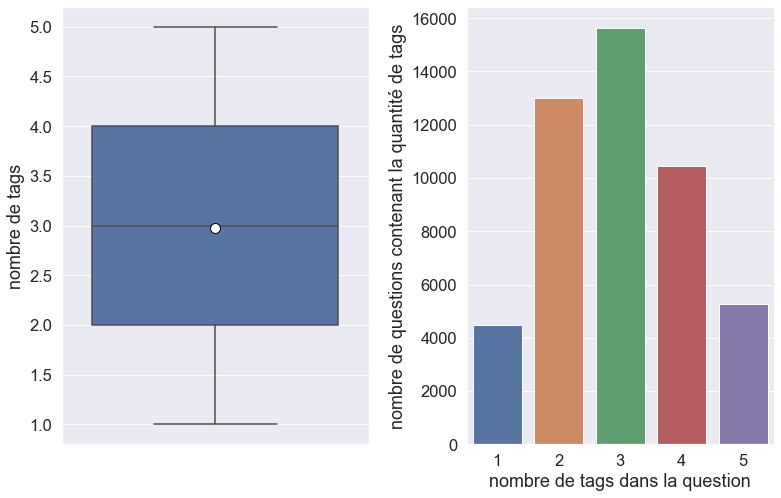

In [53]:
#plt.figure(figsize = (9,8))
figure, axes = plt.subplots(nrows=1, ncols=2,figsize = (12,8))
figure.tight_layout(pad=3.0)
plt.subplot(1,2,1)
sns.boxplot(y = tags_quant,showmeans=True,meanprops={"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
plt.ylabel("nombre de tags")
plt.subplot(1,2,2)
sns.countplot(x = tags_quant)
plt.xlabel("nombre de tags dans la question")
plt.ylabel("nombre de questions contenant la quantité de tags")

#### statistiques des tags  dans  l'ensembe des questions 

* recupération de l'ensemble des tags 

In [54]:
def construct_coepora_tags(post_data) :
    tags_data = list()
    n_posts = post_data.shape[0]
    for post in np.arange(n_posts) :
        tags_data += post_data.loc[post,"cleaned_tag"]
    return tags_data

In [55]:
corpora_tags = construct_coepora_tags(post_data)
corpo_tags = pd.DataFrame({"tags":corpora_tags})
data_tags = pd.DataFrame({"tag":corpo_tags["tags"].value_counts().index,"nombre occurence":corpo_tags["tags"].value_counts().values})
data_tags


,tag,nombre occurence
0,c#,6952
1,.net,4908
2,java,4221
3,c++,3056
4,python,2591
...,...,...
9047,libsvm,1
9048,banking,1
9049,uiimagejpegrepresentation,1
9050,swiftmailer,1


9052 tags différents contre 145677 tags employés

* statistiques de l'ensemble des tags 

In [56]:
data_tags["nombre occurence"].describe()

count    9052.000000
mean       16.093350
std       129.600472
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      6952.000000
Name: nombre occurence, dtype: float64

In [57]:
data_tags[0:220]

,tag,nombre occurence
0,c#,6952
1,.net,4908
2,java,4221
3,c++,3056
4,python,2591
...,...,...
215,reporting-services,101
216,haskell,101
217,continuous-integration,100
218,internationalization,100


* répartitions des occurences des tags 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


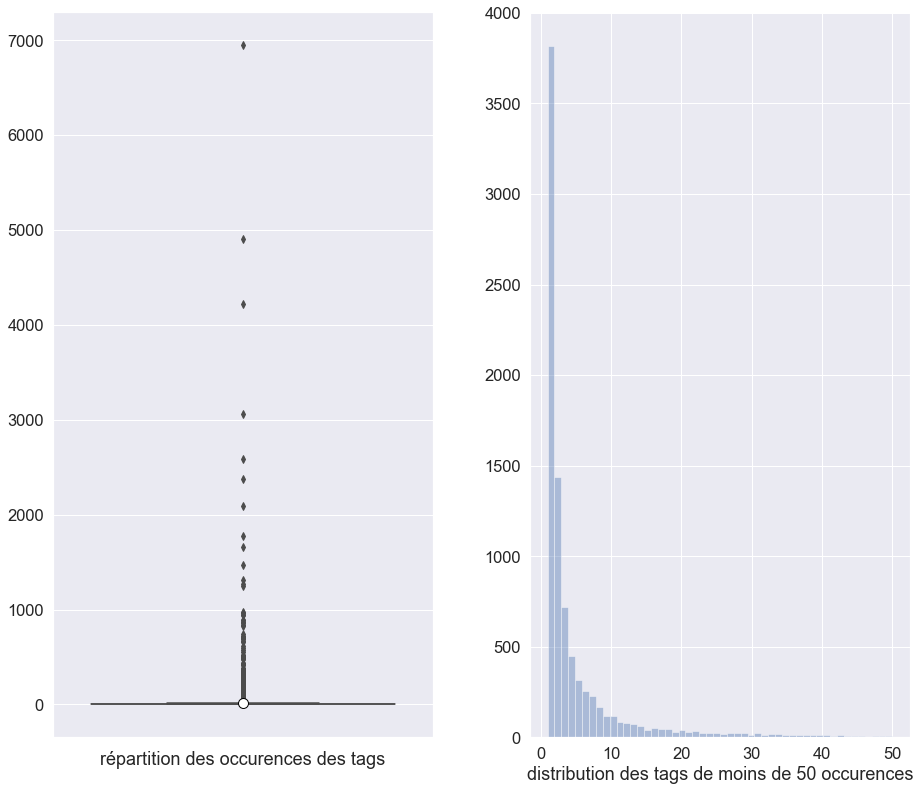

In [58]:
sns.set(font_scale= 1.50) 
figure, axes = plt.subplots(nrows=1, ncols=2,figsize = (14,12))
figure.tight_layout(pad=3.0)
plt.subplot(1,2,1)
g1=  sns.boxplot(y = data_tags["nombre occurence"],showmeans=True,meanprops={"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
g1.set(ylabel=None)
plt.xlabel("répartition des occurences des tags")

plt.subplot(1,2,2)
g2= sns.distplot(data_tags[data_tags["nombre occurence"] <= 50]["nombre occurence"], kde=False)
plt.xlabel("distribution des tags de moins de 50 occurences")
plt.show()

* les tags les plusfréquents  et les tags les moins plusfréquents  

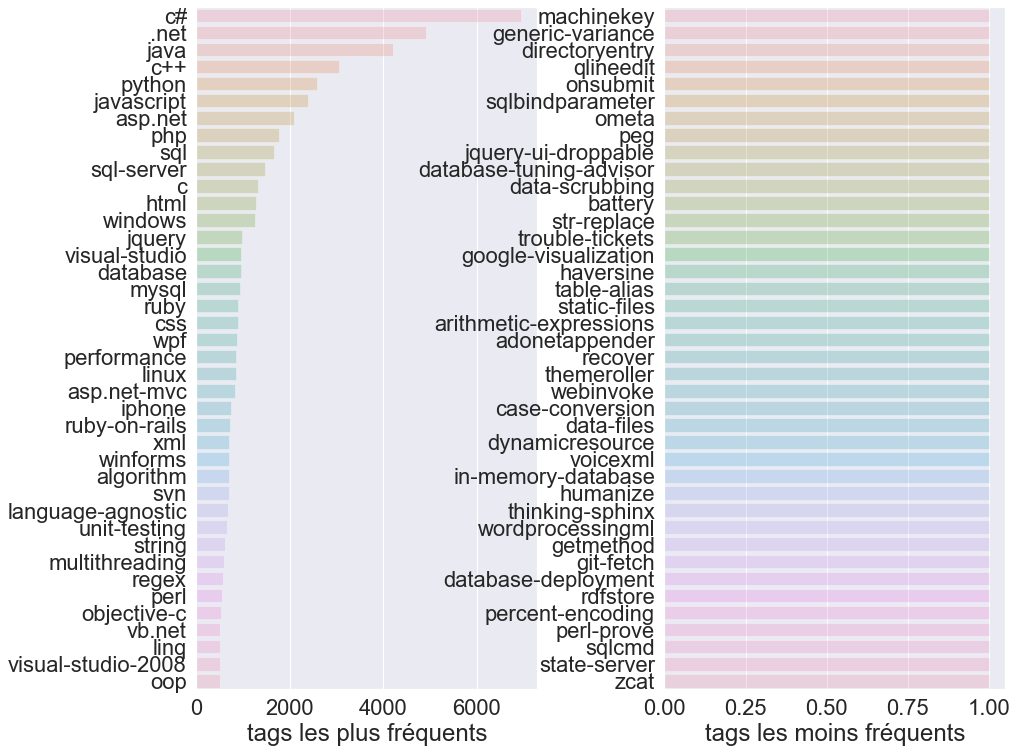

In [50]:
sns.set(font_scale=2) 
figure, axes = plt.subplots(nrows=1, ncols=2,figsize = (14,12))
figure.tight_layout(pad=3.0)
plt.subplot(1,2,1)
g1 =sns.barplot(y= data_tags["tag"].head(40),
            x=data_tags["nombre occurence"].head(40),orient="h",
            data= data_tags, alpha=0.3,axes = axes[0])
g1.set(ylabel=None)
plt.xlabel("tags les plus fréquents")
plt.subplot(1,2,2)
g2 =sns.barplot(y= data_tags["tag"].tail(40),
            x=data_tags["nombre occurence"].tail(40),orient="h",
            data= data_tags, alpha=0.3,axes = axes[1])
g2.set(ylabel=None)
plt.xlabel("tags les moins fréquents")
plt.show()

* lvocabulaire simplifié des tags

(-0.5, 799.5, 499.5, -0.5)

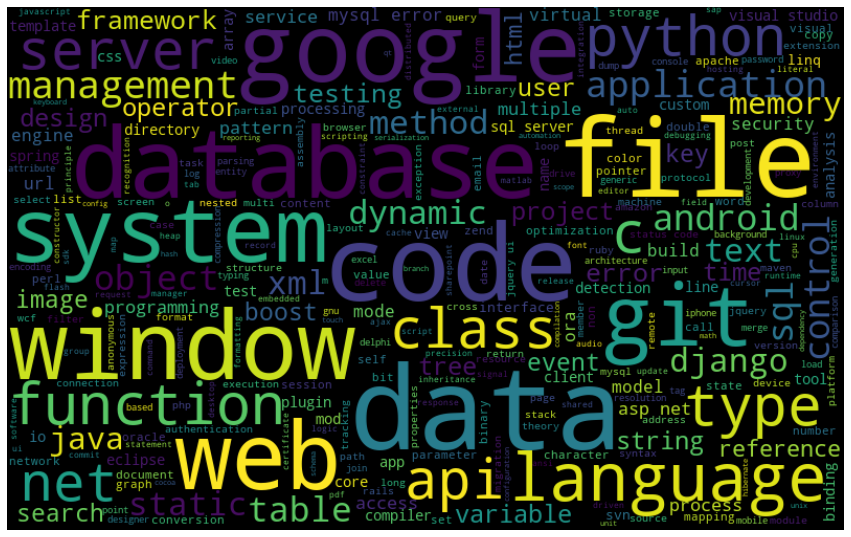

In [51]:
dict_tags = list(data_tags["tag"])
corpus_tags =  " ".join(dict_tags)
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110,max_words=300,).generate(corpus_tags)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

###  Enregistrement des données traitées pour la modelisation 

In [94]:
post_data_clean = post_data[['Id','stem_text','cleaned_tag', 'nb_tags']]

In [117]:
post_data_clean.to_csv("post_data_clean.csv",sep = ";",index = False)

In [135]:
post_data.to_csv("post_data.csv",sep = ";",index = False)